In [2]:
%matplotlib inline

/Users/peter/.virtualenvs/env4/lib/python2.7/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pyBigWig
import bbi

In [3]:
remote_path = ('http://hgdownload.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeSydhTfbs/'
               'wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig')
local_path = 'wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig'


In [4]:
!wget http://hgdownload.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeSydhTfbs/wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig

--2017-05-30 13:46:51--  http://hgdownload.cse.ucsc.edu/goldenPath/hg19/encodeDCC/wgEncodeSydhTfbs/wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig
Resolving hgdownload.cse.ucsc.edu... 128.114.119.163
Connecting to hgdownload.cse.ucsc.edu|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 286285853 (273M) [text/plain]
Saving to: ‘wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig’

wgEncodeSydhTfbsGm1 100%[===================>] 273.02M  8.43MB/s    in 35s     

2017-05-30 13:47:27 (7.74 MB/s) - ‘wgEncodeSydhTfbsGm12878Ctcfsc15914c20StdSig.bigWig’ saved [286285853/286285853]



In [6]:
bwf_remote = pyBigWig.open(remote_path)
bwf_local = pyBigWig.open(local_path)
chromsizes = bwf_remote.chroms()

In [17]:
nbins = 1024

chrom = 'chr1'
start = 0
end = (chromsizes[chrom] // nbins) * nbins

In [18]:
%time bwf = pyBigWig.open(remote_path)

CPU times: user 1.33 ms, sys: 5.93 ms, total: 7.26 ms
Wall time: 1.47 s


In [19]:
bwf_remote.stats(chrom, start=start, end=end, nBins=nbins)

RuntimeError: An error was encountered while fetching statistics.

In [ ]:
%timeit x = bbi.fetch(local_path, 'chr1', 0, -1, bins=nbins)

In [23]:
%timeit bbi.fetch(remote_path, 'chr1', 0, -1, bins=nbins)

1 loop, best of 3: 328 ms per loop


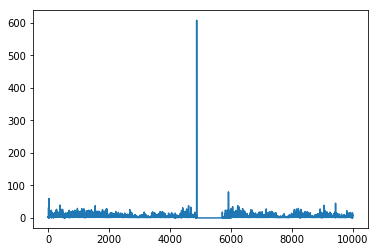

In [15]:
plt.plot(x)

In [33]:
%timeit bbi.fetch(remote_path, 'chr1', 0, -1, bins=10)

1 loop, best of 3: 326 ms per loop


In [19]:
su = bbi.stackup(remote_path, ['chr1', 'chr2', 'chr3'], 
                              [0,0,0],
                              [1000000,1000000,1000000], 
                              bins=1000)

In [20]:
print("su:", su)
print("sum:", sum(su[0]))
plt.plot(su[0])

('su:', array([[   0.        ,    0.        ,    0.        , ...,    2.63254593,
           4.982     ,  159.944     ],
       [   0.        ,    0.        ,    0.        , ...,    1.29638554,
           1.11831442,    1.47146739],
       [   0.        ,    0.        ,    0.        , ...,    1.89215686,
           1.63984674,    1.4385511 ]]))
('sum:', 2783.0688241617972)


In [6]:
import multiprocessing as mp
import time

def f(x): 
    return bbi.fetch(remote_path, x, 0, -1, bins=12)
    
p = mp.Pool(processes=32)
t1 = time.time()

chroms = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 
          'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 
          'chr18', 'chr19', 'chr20', 'chr21']
res = p.map(f, chroms)

elapsed = time.time() - t1
p.close()
print("elapsed:", elapsed, elapsed / len(chroms))

('elapsed:', 1.91758394241333, 0.09131352106730144)


In [39]:
res

[array([  5.43186158,  20.52872366,  19.30699787, ...,   3.40318259,
          4.25415871,   7.90668938]),
 array([ 2.25711115,  2.83359405,  4.05149642, ...,  4.94300203,
         5.13939115,  3.75577722]),
 array([ 2.5940948 ,  2.19404323,  4.13308957, ...,  4.49267942,
         3.45634396,  7.90211269]),
 array([ 2.93448807,  3.65983643,  1.88325037, ...,  3.34083032,
         6.13394103,  5.45970123]),
 array([ 3.39912753,  6.93595269,  4.79697881, ...,  2.62362566,
         9.11551123,  1.17056856]),
 array([ 57.321365  ,   9.88715681,   4.63744528, ...,   2.46225356,
          5.59673445,   2.05052468]),
 array([ 1.90379098,  2.54250505,  3.18566446, ...,  3.50043186,
         1.76975759,  1.71648513]),
 array([ 13.29844688,   6.54299569,   2.99618026, ...,   5.5144625 ,
          5.88318052,   6.56536451])]